<a href="https://colab.research.google.com/github/upsetshrimp/PythonWorkshop/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Workshop Project - Gilad Ben - Nun

Gilad Bennun - 204866248 <br>
First year student in BIU, applied mathematics.


## Imports and Helper functions


In [8]:
import numpy as np

import scipy.integrate as integrate
from scipy import special

import math

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline

# Optimize
from scipy import optimize
from scipy import special
from scipy.optimize import rosen_der, rosen_hess
from scipy.optimize import least_squares
import timeit


#Stats
from scipy import stats
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')

#SkLearn is in it's own section for tidiness


# Just pi because i don't like typing np.pi
PI = np.pi

'''
Helper Functions
plot_surface - plots surface plot
'''

def plot_surface(domain, fn, grid_samples=100, title=None, **plot_kwargs):
    x = np.linspace(domain[0][0], domain[0][1], grid_samples)
    y = np.linspace(domain[1][0], domain[1][1], grid_samples)
    
    X, Y = np.meshgrid(x, y)
    
    fn_vectorized = np.vectorize(fn)
    Z = fn_vectorized(X, Y)
    
    fig = plt.figure(figsize=(20,10))
    ax = plt.axes(projection="3d")
    ax.plot_surface(X, Y, Z, **plot_kwargs)
    ax.set(xlabel="x", ylabel="y", zlabel="f(x, y)", title=title)
    plt.close()

    return fig, ax

## General stuff

### Something we haven't done from the Numpy tutorial:
#### Write a NumPy program to subtract the mean of each row of a given matrix.

In [ ]:
mat = np.random.rand(5, 10)
new_mat = mat - mat.mean(axis=1, keepdims=True)
print(f"Original matrix:\n{mat}\n")
print(f"Subtract the mean of each row of the original matrix matrix:\n{new_mat}")

Original matrix:
[[0.77200394 0.36504538 0.11184786 0.27950067 0.71947401 0.52209879
  0.16802404 0.30383412 0.46038034 0.21619795]
 [0.72564588 0.93592059 0.75120309 0.67389756 0.4187792  0.80596528
  0.39649436 0.97685664 0.1440894  0.43678813]
 [0.68195417 0.09383175 0.77427998 0.73691392 0.77042297 0.86282722
  0.711541   0.16637964 0.03490913 0.23314632]
 [0.1648149  0.1426351  0.32178933 0.24896421 0.26074005 0.31758268
  0.0824644  0.42506503 0.1013228  0.65065668]
 [0.02749968 0.21052517 0.28473343 0.04276955 0.64548868 0.46614964
  0.55904073 0.65417312 0.15191618 0.76053276]]

Subtract the mean of each row of the said matrix:
[[ 0.38016324 -0.02679533 -0.27999285 -0.11234004  0.3276333   0.13025808
  -0.22381667 -0.08800659  0.06853963 -0.17564276]
 [ 0.09908187  0.30935657  0.12463908  0.04733354 -0.20778482  0.17940127
  -0.23006965  0.35029263 -0.48247461 -0.18977588]
 [ 0.17533356 -0.41278886  0.26765937  0.23029331  0.26380236  0.35620661
   0.20492038 -0.34024097 -0.471

### View Vs Copy Example

In [ ]:
arr = np.ones((2,3))
v_arr = arr.view()
c_arr = arr.copy()

arr[0][0]=42
print(f"Original:\n{arr}\nView:\n{v_arr}\nCopy:\n{c_arr}")

Original:
[[42.  1.  1.]
 [ 1.  1.  1.]]
View:
[[42.  1.  1.]
 [ 1.  1.  1.]]
Copy:
[[1. 1. 1.]
 [1. 1. 1.]]


###Broadcasting Exmaple
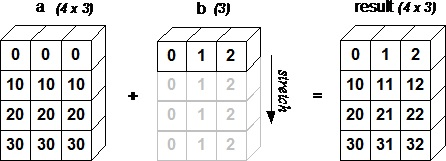

In [ ]:
a = np.array([[0.,0.,0.],[10.,10.,10.],[20.,20.,20.],[30.,30.,30.]]) 
b = np.array([1.,2.,3.])  
   
print(f"a:\n{a}\n\nb:\n{b}\n\n")
print(f"a+b:\n{a+b}")

a:
[[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]

b:
[1. 2. 3.]


a+b:
[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


As you can see, the view changed with the original, while the copy did not.

### Debugging

In [9]:
def valid(candidate):
    if candidate <= 1:
        return False

    lower = candidate - 1
    while lower > 1:
        import pdb; pdb.set_trace()
        if candidate / lower == candidate // lower:
            return False
        lower -= 1

    return True


assert not valid(1)
assert valid(3)
assert not valid(15)
assert not valid(18)
assert not valid(50)
assert valid(53)



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 332, in set_trace
    sys.settrace(self.trace_dispatch)



> <ipython-input-9-d1e6c5e721ea>(8)valid()
-> if candidate / lower == candidate // lower:
(Pdb) candidate
3
(Pdb) candidate / lower
1.5
(Pdb) candidate // lower
1
(Pdb) n
> <ipython-input-9-d1e6c5e721ea>(10)valid()
-> lower -= 1
(Pdb) c



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 343, in set_continue
    sys.settrace(None)



> <ipython-input-9-d1e6c5e721ea>(8)valid()
-> if candidate / lower == candidate // lower:
(Pdb) q



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 357, in set_quit
    sys.settrace(None)



BdbQuit: ignored

In [ ]:
%debug

> /usr/lib/python3.7/bdb.py(113)dispatch_line()
    111         if self.stop_here(frame) or self.break_here(frame):
    112             self.user_line(frame)
--> 113             if self.quitting: raise BdbQuit
    114         return self.trace_dispatch
    115 

ipdb> q


### Choose, Select, Where

In [ ]:
#Choose
mat = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
chosen = np.choose([2, 0, 1], mat)   
#Select
x = np.arange(10)
condlist = [x<3, x>5]
choicelist = [x, x**2]
selected = np.select(condlist, choicelist)
#Where
a, b = np.ogrid[:3, :4]
whered = np.where(a < b, a, 10 + b)

print(f"Chosen:\n{chosen}\nSelected:\n{selected}\nWhere:\n{whered}")

Chosen:
[7 2 6]
Selected:
[ 0  1  2  0  0  0 36 49 64 81]
Where:
[[10  0  0  0]
 [10 11  1  1]
 [10 11 12  2]]


### Sieve of Eratosthenes
([Wikipedia](https://www.wikiwand.com/en/Sieve_of_Eratosthenes))
Visualization:


![SieveUrl](https://upload.wikimedia.org/wikipedia/commons/b/b9/Sieve_of_Eratosthenes_animation.gif?1616590917955"Sieve")


In [11]:
%%prun
def sieve(n):
    flags = np.ones(n, dtype=bool)
    flags[0] = flags[1] = False
    for i in range(2, math.floor(math.sqrt(n))): #Only need to check up to the sqaure root for effiecncy
        if flags[i]:
            flags[i*i::i] = False ##every i-th element of the falgs gets marked 
    return np.flatnonzero(flags)
with np.printoptions(threshold=np.inf, linewidth=200): #Modify print style, and prevent truncation
    print(sieve((100000)))

[    2     3     5     7    11    13    17    19    23    29    31    37    41    43    47    53    59    61    67    71    73    79    83    89    97   101   103   107   109   113   127   131   137
   139   149   151   157   163   167   173   179   181   191   193   197   199   211   223   227   229   233   239   241   251   257   263   269   271   277   281   283   293   307   311   313   317
   331   337   347   349   353   359   367   373   379   383   389   397   401   409   419   421   431   433   439   443   449   457   461   463   467   479   487   491   499   503   509   521   523
   541   547   557   563   569   571   577   587   593   599   601   607   613   617   619   631   641   643   647   653   659   661   673   677   683   691   701   709   719   727   733   739   743
   751   757   761   769   773   787   797   809   811   821   823   827   829   839   853   857   859   863   877   881   883   887   907   911   919   929   937   941   947   953   967   971   977
   98

### Fibonacci: Cache vs No cache
I discovered cache from functools, to help cache and use inefficient methods and make them run much faster

In [1]:
!pip3 install line_profiler

Processing /root/.cache/pip/wheels/77/fb/d8/d022200f76f365ac22b27ffb03024baf72d51634f5b559c3e1/line_profiler-3.2.0-cp37-none-any.whl


In [7]:
%prun
def fib(n):
  if n<=1:
    return n
  return fib(n-1)+fib(n-2)
#lp = LineProfiler()
#fib_wrapper = lp(fib)

fibs = []
for i in range(30):
  fibs.append(fib(i))


In [ ]:
lp.print_stats()

Timer unit: 1e-06 s

Total time: 3.87503 s
File: <ipython-input-14-e072aae59a92>
Function: fib at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def fib(n):
     3   4356586    1954132.0      0.4     50.4    if n<=1:
     4   2178308     813679.0      0.4     21.0      return n
     5   2178278    1107220.0      0.5     28.6    return fib(n-1)+fib(n-2)



The theoretical time is $O(2^n)$ (exponential)<br>
By the amount of hits we got on each line, this lines up (with our $n=30$)
Now Let's use cache to make it more efficient
---



In [ ]:
%%timeit
try: #Thanks StackOverFlow
    from functools import lru_cache
except ImportError:
    from backports.functools_lru_cache import lru_cache

@lru_cache(maxsize=1000)
def fib(n):
  if n<=1:
    return n
  return fib(n-1)+fib(n-2)
fibs = []

for i in range(30):
  fibs.append(fib(i))

10000 loops, best of 5: 24.9 µs per loop


The functools cache doesn't like the Line Profiler, so we'll use timeit to gague run time

You can also see that the cached run did way more iterations, this is due to timeit's decision on how many iterations to do depending on the runtime

## SciPy


### Single Integral
$$f(x)=e^{x^2} $$

1.4626517459071815


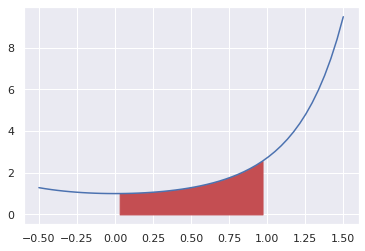

In [ ]:
f = lambda x: np.exp(x**2)
I = integrate.quad(f,0,1)
x = np.linspace(-0.5,1.5)
y=f(x)
plt.fill_between(x, y, 0,
                 where = (x > 0) & (x <= 1),
                 color = 'r')
plt.plot(x,y)
print(I[0])

$$\int_0^1{e^{x^2}}dx \approx 1.4626517 $$
There is no closed form for this integral, so a numerical approach is a must here

### Integral With Parameters
$$ g(x)=ax^c +b $$

2062.0


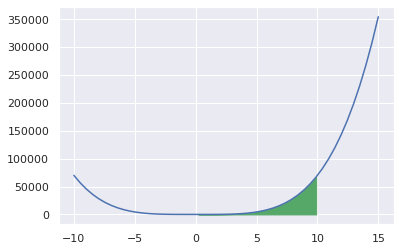

In [14]:
def g(a,b,c,x):
  return a*x**c+b
a=7
b=5
c=4
I2 = integrate.quad(g, 0, 2, args=(a,b,c))
print(I2[0])

x=np.linspace(-10,15)
y=g(a,b,c,x)
plt.fill_between(x, y, 0,
                 where = (x > 0) & (x <= 10),
                 color = 'g')
plt.plot(x,y)

### Double Integral
$$f(x,y)=x+sin(y)+1 $$

(25.132741228718345, 2.7902947984069055e-13)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


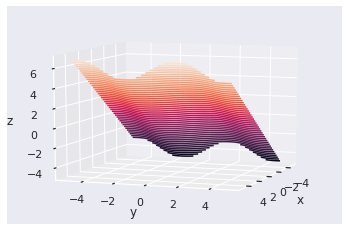

In [ ]:
def func1(x,y):
  return x+np.sin(y)+1
I3= integrate.dblquad(func1,-PI,PI, lambda x:0,lambda x:2)
print(I3) #8*pi

x=np.linspace(-5,5,300)
y=np.linspace(-5,5,300)

X,Y=np.meshgrid(x,y)
Z=func1(X,Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(10, 20)


 

$$\int^{\pi}_{-\pi}\int_0^2{x+sin(y)+1}dxdy=8\cdot \pi$$
$$25.132741228718345 \approx 8\cdot \pi \pm  2.7902947984069055\times 10^{-13}$$

### Extra plot - Mobious Strip


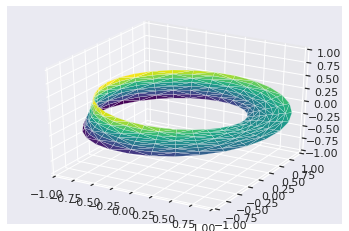

In [ ]:
from matplotlib.tri import Triangulation
theta = np.linspace(0, 2 * PI, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)
phi = 0.5 * theta
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

### Integration of Samples


0.16670137442732197 0.16666737498831272
3.39994390092524e-05


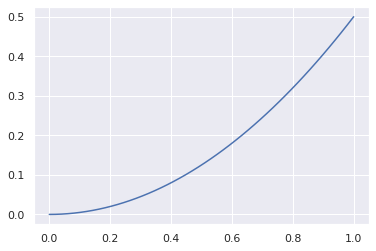

In [ ]:
t = lambda x: (x**2)/2.0
x = np.linspace(0,1)
y = t(x)
plt.plot(x,y)
trapzI  = integrate.trapz(y,x) #Explain when to use trapz and when to use simps
simpsI = integrate.simps(y,x)
print(trapzI,simpsI)
print((trapzI-simpsI))

## Optimize

### Min of scalar function, with and without constraints.

The Minimum of f is at ( 2.6942541371038593 , 23.402798991034512 )


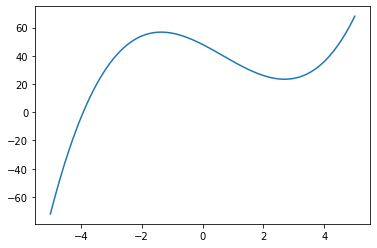

In [ ]:
def f(x):
  return (x-7)**2 +(x-1)**3
x = np.linspace(-5,5,100)
y=f(x)
plt.plot(x,y)

res = optimize.minimize_scalar(f)
print("The Minimum of f is at (",res.x,",",f(res.x),")")


We will be optimizing the following problem:

$$min_{x_0,x_1} 100(x_1-x_0^2)+(1-x_0)^2$$
With the following constraints:
$$
x_0+2x_1\le1 \\
x_0^2+x_1\le1\\
x_0^2-x_11\le1\\
2x_0+x_1=1\\
0\le x_0 \le 1\\
-0.5 \le x_1 \le 2.0
$$

https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#root-finding

In [ ]:
bounds = optimize.Bounds([0, -0.5], [1.0, 2.0])
linear_constraint = optimize.LinearConstraint([[1, 2], [2, 1]], [-np.inf, 1], [1, 1])
def cons_f(x):
  return [x[0]**2 + x[1], x[0]**2 - x[1]]
def cons_J(x):
  return [[2*x[0], 1], [2*x[0], -1]]
def cons_H(x, v):
  return v[0]*np.array([[2, 0], [0, 0]]) + v[1]*np.array([[2, 0], [0, 0]])
nonlinear_constraint = optimize.NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=cons_H)


x0 = np.array([0.5, 0])
res = optimize.minimize(rosen, x0, method='trust-constr', jac=rosen_der, hess=rosen_hess,constraints=[linear_constraint, nonlinear_constraint], bounds=bounds)

print(res.x)

[0.41494531 0.17010937]


### Six-Hump Camelback function:
$$f(x_1,x_2)=(4-2.1x_1^2+\frac{x_1^4}{3})\cdot x_1^2+x_1x_2+(-4+4x_2^2)x_2^2$$

Minimum at (0.08984196526514035,-0.7126563469723942,-1.0316284534898454)


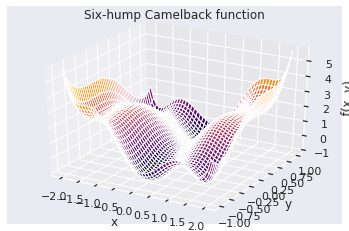

In [17]:
def sixhump(x):
   return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]),cmap='inferno', antialiased=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

min = optimize.minimize(sixhump,x0=[1,1],method='BFGS')
print(f"Minimum at ({min.x[0]},{min.x[1]},{sixhump(min.x)})")
plt.show()


### Root of Scalar and multrivariate functions



$$
f(x) = x^3-x^2+\frac{sin(\frac{1}{x})-15}{x^2}\\ \\
ripple(x,y)=\frac{sin(10\cdot(x^2y^2))}{10}
$$

the scalar function's root is at (1.9678453170272092,4.440892098500626e-16)
    fjac: array([[-1.]])
     fun: array([-7.34788079e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-9.6590937e-13])
       r: array([-1.88144155])
  status: 1
 success: True
       x: array([0.94072078])
The Ripple function's root is at ([0.94072078]) 


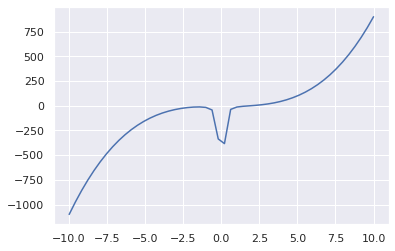

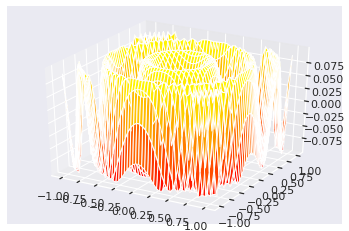

In [ ]:
scalarFunc = lambda x: x**3-x**2+(np.sin(1/x)-15)/x**2
root = optimize.brentq(scalarFunc,-10,10)

x1 = np.linspace(-10,10)
y1 = scalarFunc(x1)

plt.plot(x1,y1)
print(f"the scalar function's root is at ({root},{scalarFunc(root)})")
def ripple(x,y):
  return (np.sin(10*(x**2+y**2)))/10

x = np.linspace(-1,1)
y = np.linspace(-1,1)
X,Y = np.meshgrid(x,y)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X,Y,ripple(X,Y),cmap=plt.cm.autumn, antialiased=True)


root2 = optimize.root(ripple, 1,1)
print(root2)
print(f"The Ripple function's root is at ({root2.x}) ")

### And now with The Jacobian (And with constraints)

$$f(x_1 \cdots x_n) = \sum_{i=1}^{n-1} (100(x_i^2 - x_{i+1})^2 + (1-x_i)^2)$$ 

In [18]:
import timeit
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)
ineq_cons = {'type': 'ineq',
             'fun' : lambda x: np.array([1 - x[0] - 2*x[1],
                                         1 - x[0]**2 - x[1],
                                         1 - x[0]**2 + x[1]]),
             'jac' : lambda x: np.array([[-1.0, -2.0],
                                         [-2*x[0], -1.0],
                                         [-2*x[0], 1.0]])}
eq_cons = {'type': 'eq',
           'fun' : lambda x: np.array([2*x[0] + x[1] - 1]),
           'jac' : lambda x: np.array([2.0, 1.0])}
x0 = np.array([0.5, 0])        
bounds = optimize.Bounds([0, -0.5], [1.0, 2.0])
res_jac =  optimize.minimize(rosen, x0, method='SLSQP', jac=rosen_der,constraints=[eq_cons, ineq_cons], options={'disp': False},bounds=bounds)
res_nojac = optimize.minimize(rosen, x0, method='SLSQP', jac=False,constraints=[eq_cons, ineq_cons], options={'disp': False},bounds=bounds)
print(res_jac,"\n")
print(res_nojac,"\n")
print(f"Iterations with analytical Jacobian: {res_jac.nfev}\n Iterations With numerical Jacobian: {res_nojac.nfev}")

     fun: 0.34271757499419825
     jac: array([-0.82676145, -0.41372864])
 message: 'Optimization terminated successfully.'
    nfev: 5
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.41494475, 0.1701105 ]) 

     fun: 0.34271757499503896
     jac: array([-0.82675983, -0.41372783])
 message: 'Optimization terminated successfully.'
    nfev: 17
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.41494475, 0.1701105 ]) 

Iterations with analytical Jacobian: 5
 Iterations With numerical Jacobian: 17


As you can see, we did a lot more iterations without the Jacobian

### Global minimum of the Rastrigin Function (N=2)
$$
rastrigin(x,y) = x^2-10\cdot cos(2\pi x) + y^2 -10\cdot cos(2\pi y) +20
$$

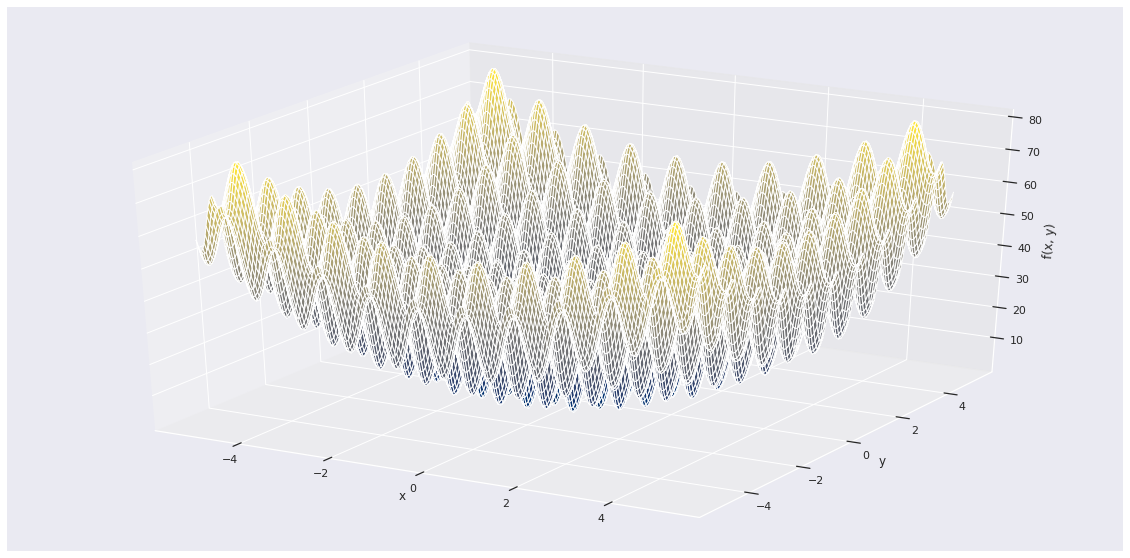

In [ ]:
def rastrigin(x,y):
  return (x**2 - 10 * np.cos(2 * PI * x)) + (y**2 - 10 * np.cos(2 * PI * y))+20

domain = [(-5.12, 5.12), (-5.12, 5.12)] 
fig, ax = plot_surface(domain, rastrigin,grid_samples=200, rstride=1, cstride=1, cmap='cividis') #You can Increase grid samples for a nicer plot, but at a cost of a lot of runtime
fig

#  Now to find the global minimum


In [ ]:
best_res = optimize.minimize(rastrigin, 1, 1, method='nelder-mead')
print("Searching....") 
for i in range(0,100): #Try and vectorize this to utilize multi threading
  for j in range(0,100):
    res = optimize.minimize(rastrigin, i, j, method='nelder-mead')
    if (res.fun < best_res.fun):
      best_res = res
      print("Switching to (",res.x,",",res.fun,")")
print("Gridsearch found the global minimum to be at (",float(best_res.x),",",best_res.fun,")")


Searching....
Switching to ( [0.] , 0.0 )
Gridsearch found the global minimum to be at ( 0.0 , 0.0 )


Of course that found it quickly, because the rastrigin function has a global minimum at $(0,0)$
Here's another shot at the Gridsearch with different parameters:

In [ ]:
best_res = optimize.minimize(rastrigin, 1, 1, method='nelder-mead')
print("Searching....")
for i in range(100,1,-2):
  for j in range(0,100):
    res = optimize.minimize(rastrigin, i, j, method='nelder-mead')
    if (res.fun < best_res.fun):
      best_res = res
      print("Switching to (",res.x,",",res.fun,")")
print("Gridsearch found the global minimum to be at (",float(best_res.x),",",best_res.fun,")")

Searching....
Switching to ( [0.] , 0.0 )
Gridsearch found the global minimum to be at ( 0.0 , 0.0 )


Since gridsearch is inefficient, let's see how simulated annealing handles it (It's scipy's implementation of the rastrigin function in 10D)

Implemented to run 100 times with different seeds

Since the Rastrigin function is meant to be an optimization edge case, it's hard to optimize, hence the need for a few iterations.

In [21]:
rast = lambda x: np.sum(x*x - 10*np.cos(2*PI*x)) + 10*np.size(x)
lw = [-5.12] * 10
up = [5.12] * 10
best_res_annealing = optimize.dual_annealing(rast, bounds=list(zip(lw, up)))
print("Searching...")
for i in range(100):
  res = optimize.dual_annealing(rast, bounds=list(zip(lw, up)))
  #print( "Checking ", res.fun)
  if (res.fun < best_res_annealing.fun):
    best_res_annealing = res
  if(best_res_annealing.fun == 0):
    break; #obviously wouldn't do that in a real world application, but to save run time on this notebook.
print("Best global minimum found at ", best_res_annealing.x)


Searching...
Best global minimum found at  [ 9.38111763e-10  2.10023542e-09 -3.95030738e-09 -3.95517526e-09
  7.12523395e-10  2.05120949e-09 -3.72683780e-10  1.49975069e-09
 -2.67164093e-09 -4.47807107e-09]


### Non-linear regression

> observed displacement of a linear damped oscillator




In [ ]:
def generate_data(t, A, sigma, omega, noise=0, n_outliers=0, random_state=0):
    y = A * np.exp(-sigma * t) * np.sin(omega * t)
    rnd = np.random.RandomState(random_state)
    error = noise * rnd.randn(t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] *= 35
    return y + error

Model parameters:

In [ ]:
A = 2
sigma = 0.1
omega = 0.1 * 2 * PI

noise = 0.1

t_min = 0
t_max = 30

Add 3 outliers:

In [ ]:
t_train = np.linspace(t_min, t_max, 30)
y_train = generate_data(t_train, A, sigma, omega, noise=noise, n_outliers=4)

In [ ]:
def fun(x, t, y):
    return x[0] * np.exp(-x[1] * t) * np.sin(x[2] * t) - y
x0 = np.ones(3) # Initial guess

Now let's calculate least squares:

In [ ]:
res_lsq = least_squares(fun, x0, args=(t_train, y_train))
res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.1, args=(t_train, y_train))

t_test = np.linspace(t_min, t_max, 300)
y_test = generate_data(t_test, A, sigma, omega)

# Compute predictions with both robust lsq and normal lsq
y_lsq = generate_data(t_test, *res_lsq.x)
y_robust = generate_data(t_test, *res_robust.x)


The soft l1 function is the following loss function:
$$
L_{1;smooth} = \begin{cases}|x| & \text{if $|x|>\alpha$;} \\
\frac{1}{|\alpha|}x^2 & \text{if $|x| \leq \alpha$}\end{cases}
$$
It behaves as L1-loss when the absolute value of the argument is high, and it behaves like L2-loss when the absolute value of the argument is close to zero.
For reference, the normal l1 loss function looks like this:
$$
L_1=\sum_{i=1}^n{|y_{true}-y_{predicted}|}
$$

### And now the plot:

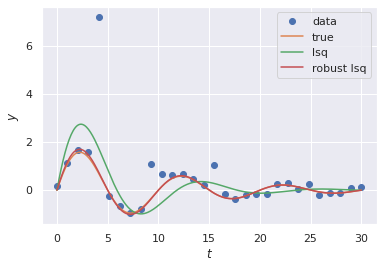

In [ ]:
plt.plot(t_train, y_train, 'o', label='data')
plt.plot(t_test, y_test, label='true')
plt.plot(t_test, y_lsq, label='lsq')
plt.plot(t_test, y_robust, label='robust lsq')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend();

As you can see, the standard least squares reacted to the outliers, giving a more biased curve (look at the peak at $x\approx2.5$)

While the robust least squares *(with soft l1 loss)* gave a much better curve fit, with less bias.

## Stats


### Normal distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


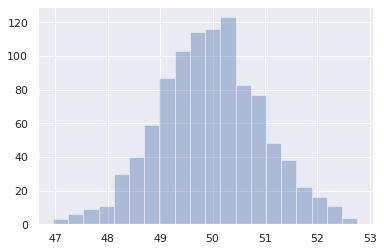

In [ ]:
np.random.seed(0)
x_rand = np.random.normal(loc=50,scale=1.0,size=1000)
sns.distplot(x_rand,bins=20 ,kde=False)

Comparison of the KDE with the normal distribution fit from scipy.stats


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


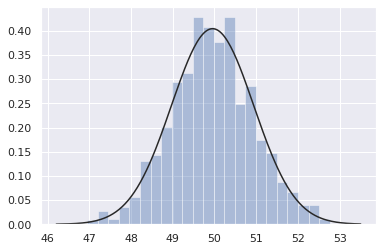

In [ ]:
sns.distplot(x_rand,fit=stats.norm, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


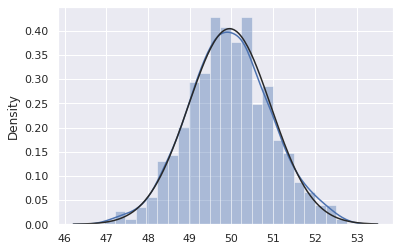

In [ ]:
sns.distplot(x_rand,fit=stats.norm, kde=True)

### PDF - probability Density Function

Text(0, 0.5, 'PDF')

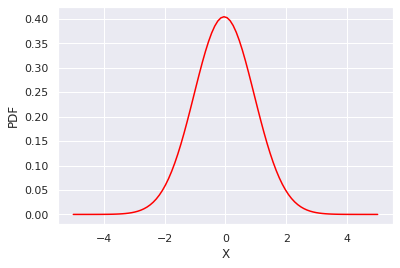

In [ ]:
loc, scale = stats.norm.fit(x_rand)
x = np.linspace(-5,5,100)
pdf = stats.norm.pdf(x,loc=loc,scale=scale)
plt.plot(x,pdf, color="red")
plt.xlabel('X')
plt.ylabel('PDF')

### CDF - Cumulative Distributiuon Function (Integral of the PDF)

Text(0, 0.5, 'CDF = P(x≤X)')

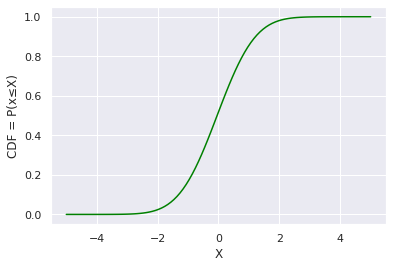

In [ ]:
cdf = stats.norm.cdf(x,loc=loc,scale=scale)
plt.plot(x,cdf,color='green')
plt.xlabel('X')
plt.ylabel('CDF = P(x≤X)')

### Calculating Mode
No actual Scipy modules, but it is statistics related

In [ ]:
def mode(arr):
  dict_vals = {i: arr.count(i) for i in arr}
  return [k for k, v in dict_vals.items() if v == max(dict_vals.values())]
print(f"Mode: {mode([1,2,3,4,5,5,4])}")

Mode: [4, 5]


In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/upsetshrimp/PythonWorkshop/main/netflix_titles.csv' #uploaded the csv file to my personal github for easier loading
netflix_overall = pd.read_csv(url)


netflix_movies=netflix_overall[netflix_overall['type']=='Movie']
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']

netflix_overall.head(5) #Check to see dataframe is loaded correctly, and see the shape of the data


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


We have 12 columns of data to explore

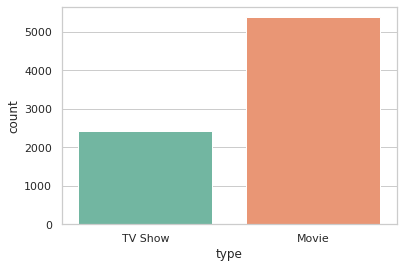

In [ ]:

sns.set(style="whitegrid")
ax = sns.countplot(x="type", data=netflix_overall, palette="Set2")

### AS you can see, there are way moe movies on Netflix than TV shows

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

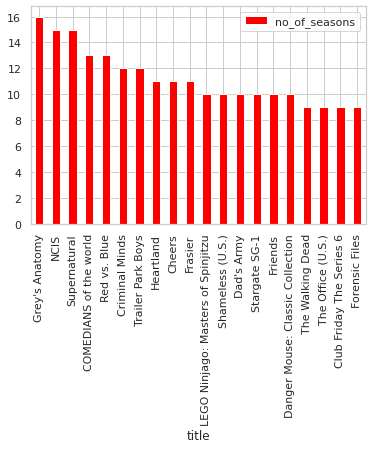

In [ ]:
x=['title','no_of_seasons']
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','') #View vs copy

durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
top=durations[x]
top=top.sort_values(by='no_of_seasons', ascending=False)

top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

### Some boxplots with fake data

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


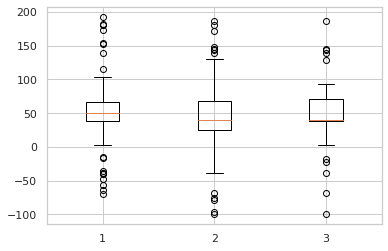

In [ ]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
data.shape = (-1, 1)
d2.shape = (-1, 1)

data = [data, d2, d2[::2, 0]]

plt.figure()
plt.boxplot(data)

plt.show()

# Ttest


In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/upsetshrimp/PythonWorkshop/main/genotype.csv'
df = pd.read_csv(url)
df.head(11) #The entire 'dataset' (only 11 entries)

,Genotype,yield
0,A,78.0
1,A,84.3
2,A,81.0
3,B,88.0
4,B,92.0
5,B,84.1
6,A,74.5
7,A,77.8
8,A,79.0
9,B,88.0


In [ ]:
a = df.loc[df['Genotype'] == 'A', 'yield'].to_numpy()
b = df.loc[df['Genotype'] == 'B', 'yield'].to_numpy()
ttest_equal_variance = stats.ttest_ind(a=a, b=b, equal_var=True)  #uses standard independent 2 sample test that assumes equal population variances
print(f"stat: {ttest_equal_variance[0]}\np Value: {ttest_equal_variance[1]}")

stat: -5.407091104196024
p Value: 0.00029840786595462836


# Scikit-Learn
## A Project involving Analyzing text, and getting sentiment based on Amazon reviews
### Per usual, the dataset is uploaded to my Github

#### Classes,imports and Helper functions

In [50]:
#General
import random
import json
from urllib.request import urlopen
#Prep
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
#Classification
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Eval
from sklearn.metrics import f1_score

In [33]:
class Sentiment:
  NEGATIVE = 'NEGATIVE'
  POSITIVE = 'POSITIVE'
  NEUTRAL = 'NEUTRAL' #Will be ignored in this example, but we have to do something with 3 stars

class Review:
  def __init__(self,text,score):
    self.text = text
    self.score = score
    self.sentiment = self.get_sentiment()
  def get_sentiment(self):
    if self.score <= 2:
      return Sentiment.NEGATIVE
    elif self.score == 3:
      return Sentiment.NEUTRAL
    else: #4 or 5
      return Sentiment.POSITIVE


class ReviewContainer:
  def __init__(self,reviews):
    self.reviews = reviews

  def get_text(self):
    return [x.text for x in self.reviews]

  def get_sentiment(self):
    return [y.sentiment for y in self.reviews]


  def evenly_distribute(self):
    negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
    positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))

    positive_shrunk = positive[:len(negative)]
    self.reviews = negative + positive_shrunk
    random.shuffle(self.reviews) #Shuffle them because the previous step ordered them, which is bad for training


def print_f1(model,f1):
  print("Score for",model)
  print(f"Positive: {f1[0]}\nNegative: {f1[1]}\n")


#### pulling the file

In [34]:

small_url = 'https://raw.githubusercontent.com/upsetshrimp/PythonWorkshop/main/Amazon%20Reviews/data/sentiment/Books_small.json'
big_url = 'https://raw.githubusercontent.com/upsetshrimp/PythonWorkshop/main/Amazon%20Reviews/data/sentiment/Books_small_10000.json'
data = urlopen(small_url)
reviews = []
for line in data:
    review = json.loads(line)
    reviews.append(Review(review['reviewText'],review['overall']))

## Prep Data

In [35]:


training, test = train_test_split(reviews, test_size=0.33, random_state=42)
train_container = ReviewContainer(training)
test_container = ReviewContainer(test)


train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_x = test_container.get_text()
test_y = test_container.get_sentiment()


vectorizer = CountVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x) #Create Bags of words (vectorize the training data)

test_x_vectors = vectorizer.transform(test_x)

# Initial classification


#### Linear SVM

In [36]:
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(train_x_vectors,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Decision Tree

In [37]:
clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Logistic Regression

In [38]:
clf_log = LogisticRegression()
clf_log.fit(train_x_vectors,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluation

In [39]:
svm_score = clf_svm.score(test_x_vectors,test_y)
dec_score = clf_dec.score(test_x_vectors,test_y)
log_score = clf_log.score(test_x_vectors,test_y)
svm_f1 = f1_score(test_y,clf_svm.predict(test_x_vectors),average=None, labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])
dec_f1 = f1_score(test_y,clf_dec.predict(test_x_vectors),average=None, labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])
log_f1 = f1_score(test_y,clf_log.predict(test_x_vectors),average=None, labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])

In [40]:
# Mean accuracy
print("Linear SVM Score: ",svm_score)
print("Decision Tree Score: ",dec_score)
print("Logistic Regression Score: ",log_score)

#f1 score
print("Accuracy per model:\n")
print_f1("SVM",svm_f1)
print_f1("Decision Tree", dec_f1)
print_f1("Logistic Regression", log_f1)

Linear SVM Score:  0.8242424242424242
Decision Tree Score:  0.7636363636363637
Logistic Regression Score:  0.8303030303030303
Accuracy per model:

Score for SVM
Positive: 0.9131944444444444
Negative: 0.22222222222222224

Score for Decision Tree
Positive: 0.8706293706293706
Negative: 0.0

Score for Logistic Regression
Positive: 0.9137055837563453
Negative: 0.1



As You can see, the model is terrible for Neutral and negative reviews, but good on good reviews.
The reason is actually not the model, but the data, let's take a look at how many good reviews we have in our training data relative to all of the data:

In [41]:
print(train_y.count(Sentiment.POSITIVE),"/",len(train_y))

552 / 670


Since the Data is so biased, lets increase the dataset from 1,000 entries to 10,000.
<br> Very similar code, with some tweaks


In [42]:
data = urlopen(big_url)
reviews = []
for line in data:
    review = json.loads(line)
    reviews.append(Review(review['reviewText'],review['overall']))

training, test = train_test_split(reviews, test_size=0.33, random_state=42) #Same random state to bbe consistent

train_container = ReviewContainer(training)
test_container = ReviewContainer(test)

train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_x = test_container.get_text()
test_y = test_container.get_sentiment()


Let's see how many of each we have, we will also ignore Neutral reviews to make things clearer

In [43]:
print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))

5611
436


This is very biased still, but now that the dataset is bigger we can evenly distribute it without hurting the sample size too much (since this is an example it's still a relativley small sample size to make it faster to run and load)

In [44]:
#distribute training data
train_container.evenly_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()
#distribute testing data
test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))

436
436


In [45]:
vectorizer = CountVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors = vectorizer.transform(test_x)

clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(train_x_vectors,train_y)

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors,train_y)

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
svm_score = clf_svm.score(test_x_vectors,test_y)
dec_score = clf_dec.score(test_x_vectors,test_y)
log_score = clf_log.score(test_x_vectors,test_y)
svm_f1 = f1_score(test_y,clf_svm.predict(test_x_vectors),average=None, labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])
dec_f1 = f1_score(test_y,clf_dec.predict(test_x_vectors),average=None, labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])
log_f1 = f1_score(test_y,clf_log.predict(test_x_vectors),average=None, labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])

In [47]:
# Mean accuracy
print("Linear SVM Score: ",svm_score)
print("Decision Tree Score: ",dec_score)
print("Logistic Regression Score: ",log_score)

#f1 score
print("Accuracy per model:\n")
print_f1("SVM",svm_f1)
print_f1("Decision Tree", dec_f1)
print_f1("Logistic Regression", log_f1)

Linear SVM Score:  0.7980769230769231
Decision Tree Score:  0.6394230769230769
Logistic Regression Score:  0.8149038461538461
Accuracy per model:

Score for SVM
Positive: 0.8028169014084507
Negative: 0.7931034482758621

Score for Decision Tree
Positive: 0.6394230769230769
Negative: 0.6394230769230769

Score for Logistic Regression
Positive: 0.8205128205128205
Negative: 0.8089330024813896



Both Mean and f1 are improved, that's excellent

### Now let's test with brand new made up reviews

In [51]:
brand_new_reviews = ['very cool','Not recomended', 'good book', 'highly recomended','do not buy']
review_for_zip = brand_new_reviews
brand_new_reviews = vectorizer.transform(brand_new_reviews)
zipped = zip(review_for_zip,clf_svm.predict(brand_new_reviews))
list(zipped)

[('very cool', 'POSITIVE'),
 ('Not recomended', 'NEGATIVE'),
 ('good book', 'POSITIVE'),
 ('highly recomended', 'POSITIVE'),
 ('do not buy', 'NEGATIVE')]

#### That was quite good, but now let's improve our vectorizer using tf-idf, and let's focus just on SVM, since it fits this the best

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfvectorizer = TfidfVectorizer()
train_x_vectors_tf = tfvectorizer.fit_transform(train_x)
test_x_vectors_tf = tfvectorizer.transform(test_x)

In [54]:
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(train_x_vectors_tf,train_y)
clf_svm.predict(test_x_vectors_tf[0])

f1_svm = f1_score(test_y,clf_svm.predict(test_x_vectors_tf),average=None, labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])
print_f1("SVM",f1_svm)
print("Linear SVM Score: ",clf_svm.score(test_x_vectors_tf,test_y))

Score for SVM
Positive: 0.8058252427184466
Negative: 0.8095238095238094

Linear SVM Score:  0.8076923076923077


Even higher f1 score! <br>the tf-idf vectorizer gives less weight to common words, so connectives and such affect our model less

### Let's demonstrate Gridsearch, it might not help in this case but let's try
Here we try and gridsearch the best parameters for our model, and see which combination is the best

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear','rbf'),'C':(1,4,8,16,32)}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)

clf.fit(train_x_vectors_tf,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
svm_f1 = f1_score(test_y,clf_svm.predict(test_x_vectors),average=None, labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])
svm_score = clf_svm.score(test_x_vectors,test_y)

print_f1("SVM",svm_f1)
print("Linear SVM Score: ",svm_score)

Score for SVM
Positive: 0.7211267605633803
Negative: 0.7924528301886793

Linear SVM Score:  0.7620192307692307


So no noticeable improvment, but that might be because of the small sample size.